# Titanic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../csv/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [ ]:
pd.DataFrame(df.groupby('Sex')[['Fare','Survived']].mean())

,Fare,Survived
Sex,,
female,44.479818,0.742038
male,25.523893,0.188908


In [5]:
df['Has_Cabin'] = df['Cabin'].notnull().astype(int)

In [ ]:
df.Ticket

In [6]:
df['Ticket_len'] = df['Ticket'].apply(lambda x: len(str(x)))

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Ticket_len
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,9
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,8
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,16
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,6
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,6


In [7]:
df['Family']=df.SibSp+df.Parch+1
def fam_type(fam):
    if fam==1:
        return 0
    elif fam>1 and fam<=4:
        return 1
    else:
        return 2
df['Family']=df['Family'].apply(fam_type)

In [8]:
df['Name']=df['Name'].str.split(',',expand=True)[1]
df['Title']=df['Name'].str.split('.',expand=True)[0]
counts=df.Title.value_counts()

In [9]:
thresold=35
replace=counts[counts<thresold].index
df['Title'].replace(replace, 'others',inplace=True)

C:\Users\moury\AppData\Local\Temp\ipykernel_15908\2816629355.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Title'].replace(replace, 'others',inplace=True)


In [10]:
df.drop(columns=['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],inplace=True)

In [11]:
corr = df.corr(numeric_only=True)
corr

,Survived,Pclass,Age,Fare,Has_Cabin,Ticket_len,Family
Survived,1.000000,-0.338481,-0.077221,0.257307,0.316912,-0.055331,0.108631
Pclass,-0.338481,1.000000,-0.369226,-0.549500,-0.725541,0.054098,-0.043973
Age,-0.077221,-0.369226,1.000000,0.096067,0.249732,-0.024086,-0.249874
Fare,0.257307,-0.549500,0.096067,1.000000,0.482075,-0.016002,0.272196
Has_Cabin,0.316912,-0.725541,0.249732,0.482075,1.000000,-0.092648,0.088993
Ticket_len,-0.055331,0.054098,-0.024086,-0.016002,-0.092648,1.000000,-0.059322
Family,0.108631,-0.043973,-0.249874,0.272196,0.088993,-0.059322,1.000000


In [12]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,Ticket_len,Family,Title
0,0,3,male,22.0,7.2500,S,0,9,1,Mr
1,1,1,female,38.0,71.2833,C,1,8,1,Mrs
2,1,3,female,26.0,7.9250,S,0,16,0,Miss
3,1,1,female,35.0,53.1000,S,1,6,1,Mrs
4,0,3,male,35.0,8.0500,S,0,6,0,Mr


C:\Users\moury\AppData\Local\Temp\ipykernel_15908\3402112601.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Fare)


<Axes: xlabel='Fare', ylabel='Density'>

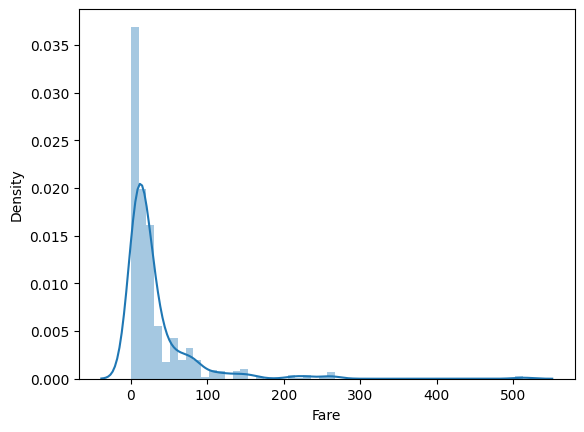

In [13]:
sns.distplot(df.Fare)

In [14]:
df.describe()

,Survived,Pclass,Age,Fare,Has_Cabin,Ticket_len,Family
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208,0.228956,6.750842,0.466891
std,0.486592,0.836071,14.526497,49.693429,0.420397,2.745515,0.623305
min,0.000000,1.000000,0.420000,0.000000,0.000000,3.000000,0.000000
25%,0.000000,2.000000,20.125000,7.910400,0.000000,5.000000,0.000000
50%,0.000000,3.000000,28.000000,14.454200,0.000000,6.000000,0.000000
75%,1.000000,3.000000,38.000000,31.000000,0.000000,7.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,1.000000,18.000000,2.000000


In [15]:
from sklearn.model_selection import cross_val_score,train_test_split

In [16]:
x=df.drop(columns=['Survived'])
y=df.Survived

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [18]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,SimpleImputer
from sklearn.preprocessing import StandardScaler,FunctionTransformer,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [19]:
def clip_outliers_iqr(X):
    X = pd.DataFrame(X)
    for col in X.columns:
        q1 = X[col].quantile(0.05)
        q3 = X[col].quantile(0.95)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        X[col] = X[col].clip(lower, upper)
    return X

clipper = FunctionTransformer(clip_outliers_iqr)

In [20]:
# Age
trf1=(
    'Age',Pipeline([
        ('impute',IterativeImputer()),
        ('outilers',clipper),
        ('scaling',StandardScaler())
    ]),['Age']
)

In [21]:
#Fare
trf2=(
    'fare',Pipeline([
        ('outliers',clipper),
        ('scaling',StandardScaler())
    ]),['Fare']
)

In [22]:
# Embarked
trf3=(
    'embarked',Pipeline([
        ('impute',SimpleImputer(strategy='most_frequent')),
        ('encode',OneHotEncoder())
    ]),['Embarked']
)

In [23]:
#gender
trf4=(
    'sex',Pipeline([
        ('OneHotEncoder',OneHotEncoder())
    ]),['Sex']
)

In [24]:
# Ticket
trf5=(
    'ticket',Pipeline([
        ('scaling',StandardScaler())
    ]),['Ticket_len']
)

In [25]:
# Title
trf6=(
    'title',Pipeline([
        ('encode',OneHotEncoder())
    ]),['Title']
)

In [26]:
transformer=ColumnTransformer(transformers=[trf1,trf2,trf3,trf4,trf5,trf6],remainder='passthrough')

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [28]:
rfc=RandomForestClassifier(n_estimators=100,
                           max_depth=5,
                           max_samples=0.5,
                           max_features=0.2,
                           oob_score=True)

In [29]:
pipe=Pipeline([
    ('transformer',transformer),
    ('classifier',rfc)
])

In [30]:
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred,y_test)

0.7988826815642458

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
n_estimators=[100,50,500,10]
max_depth=[1,5,7,3,9]
max_features=[0.2,0.5,0.25,0.75,1]
oob_score=[True,False]
bootstrap=[True,False]
n_jobs=[1,-1]
max_samples=[0.2,0.5,0.25,0.75,1]


In [34]:
param_grid={
    "__classifier_n_estimators": n_estimators,
    "__classifier_max_depth":  max_depth,
    "__classifier_max_features": max_features,
    "__classifier_oob_score": oob_score,
    "__classifier_n_jobs": n_jobs,
    "__classifier_bootstrap": bootstrap,
    "__classifier_max_samples": max_samples

}